# Predicting a person's MBTI personality type based on their online presence and communications.

1. [List of non-standard packages used in this Notebook](#section1)
2. [Introduction](#section2)
3. [Exploratory Data Analysis](#section3)
    - [Importing the necessary librairies for EDA](#section4)
    - [Importing the train and test data](#section5)
    - [Check the distribution of the Response Variable (Personality Type)](#section6)
    - [Create response variables for the different attributes of the personality traits](#section7)
    - [Concatenate train and test data into one dataframe](#section8)
    - [Preprocessing of text for use in visualisation](#section9)
    - [Wordclouds](#section10)
    - [EDA Conclusions](#section11)
4. [Data Preprocessing and Final preparation for modeling](#section12)
    - [Importing the necessary librairies for preprocessing and final data preparation](#section13)
    - [Processing raw data using TfidfVectorizer](#section14)
    - [Split the processed data into train and test sets for use in the modeling section](#section15)
5. [Initial Modelling](#section16)
    - [Importing the necessary librairies for modeling and scoring](#section17)
    - [Creating a cross-validation log loss scoring function](#section18)
    - [Logistic Regression Modeling](#section19)
    - [Multinomial Naive Bayes Modeling](#section20)
    - [AdaBoost Modeling](#section21)
6. [Hyperparameter tuning](#section22)
    - [Logistic Regression](#section23)
        - [Final modeling with hyperparameters](#section24)
    - [Multinomial Naive Bayes](#section25)
        - [Final modeling with hyperparameters](#section26)
    - [AdaBoost](#section27)
        - [Final modeling with hyperparameters](#section28)
7. [Final model fitting and submission creation](#section29)
8. [Conclusion and final thoughts](#section30)

<a id="section1"></a>
## 1. List of non-standard packages used in this Notebook

* [Pillow](https://pillow.readthedocs.io/en/stable/) - friendly PIL (Python Image Library) fork
* [WordCloud](https://github.com/amueller/word_cloud) - WordCloud, STOPWORDS, ImageColorGenerator
* [Natural Language Toolkit](https://github.com/amueller/word_cloud) - imported the relevant portions of the package
* [Optuna](https://optuna.org) - used in hyperparameter tuning

<a id="section2"></a>
## 2. Introduction

The Myers–Briggs Type Indicator (MBTI) is an introspective self-report questionnaire with the purpose of indicating differing psychological preferences in how people perceive the world around them and make decisions. 

The MBTI was constructed by Katharine Cook Briggs and her daughter Isabel Briggs Myers. It is based on the conceptual theory proposed by Swiss psychiatrist Carl Jung, who had speculated that humans experience the world using four principal psychological functions – sensation, intuition, feeling, and thinking – and that one of these four functions is dominant for a person most of the time.

According to the Myers & Briggs Foundation, there are 16 personality types based on four key dimensions that could be used to categorize people:
- Introversion vs. Extraversion
- Sensing vs. Intuition
- Thinking vs. Feeling
- Judging vs. Perceiving

Below, are the key dimensions that makeup each personality type:

<img src="https://miro.medium.com/max/700/0*afKj6ym-KtsVkJF8.png" alt="Drawing" style="width: 500px;"/>

With the help of machine learning, we are able to breakdown and classify these key dimensions into the 16 personality types. Machine learning (ML) is a category of algorithm that allows software applications to become more accurate in predicting outcomes without being explicitly programmed. The basic premise of machine learning is to build algorithms that can receive input data and use statistical analysis to predict an output while updating outputs as new data becomes available. In this section of our analysis, we relied on two specific techniques of ML, namely: Natural Language Processing (NLP) and Classification.

<img src="https://www.kdnuggets.com/wp-content/uploads/nlp-text-mining-venn.jpg" alt="Drawing" style="width: 500px;"/>

NLP processing is a vitally important part of any data scientist's toolkit. Put simply, it is the art of processing unstructured text data into a format that can be interpreted and used by computers. This unfortunately is no simple task and often requires unique solutions to a particular datasets problems. In this kernel we will show you how we went about processing unstructured text data, in the form of posts from a particular website, into a usable form which was then used to predict the given positers MBTI personality type. This kind of text processing architecture and classification has many other applications such as in use for sentiment analysis or in use for recommendation engines. 

Classification on the other hand is branch of statistical learning and ML used for identifying to which of a set of categories a new observation belongs, on the basis of a training set of data containing observations whose category membership is known.  Classification is an example of pattern recognition.

In the terminology of machine learning, classification is considered an instance of supervised learning, i.e., learning where a training set of correctly identified observations is available, and involves grouping data into categories based on some measure of inherent similarity or distance.

Often, the individual observations are analyzed into a set of quantifiable properties, known variously as explanatory variables or features. These features may variously be categorical (e.g. "A", "B", "AB" or "O", for blood type), ordinal (e.g. "large", "medium" or "small") and even integer-valued (e.g. the number of occurrences of a particular word in an email). Other classifiers work by comparing observations to previous observations by means of a similarity or distance function.

Thanks to these ML techniques, we are able to decipher the personality of an indivisual base on the above mentioned "key dimensions" that makeup a personality type in to the 16 MBT Indicators envisioned by Katharine and Isabel.

Below is a list showing the 16 different personility types in greater detail:

<img src="https://www.kona.com.au/wp-content/uploads/2017/02/MBTI-Matrix.jpg" alt="Drawing" style="width: 500px;"/>


<a id="section3"></a>
## 3. Exploratory Data Analysis

<a id="section4"></a>
### Importing the necessary librairies for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize

We chose to filter out the warnings that python prints to the console due to verbosity. You may want to comment this section out if you are experiencing any unexpected problems with the notebook

In [2]:
# Filter warnings out of outputs
import warnings
warnings.filterwarnings('ignore')

<a id="section5"></a>
### Importing the train and test data

In [3]:
# Import Kaggle MBTI data from your local folder
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6506 entries, 0 to 6505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    6506 non-null   object
 1   posts   6506 non-null   object
dtypes: object(2)
memory usage: 101.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169 entries, 0 to 2168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2169 non-null   int64 
 1   posts   2169 non-null   object
dtypes: int64(1), object(1)
memory usage: 34.0+ KB


<a id="section6"></a>
### Check the distribution of the Response Variable (Personality Type)

You generally want to check the distribution of your response variable to ascertain whether and scaling or transformations need to be performed

Text(0, 0.5, 'Count')

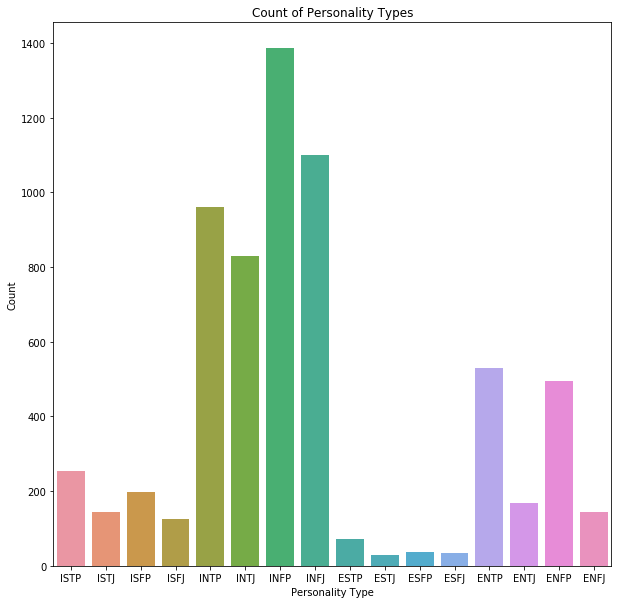

In [4]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(df_train['type'].sort_values(ascending=False))
plt.title("Count of Personality Types")
plt.xlabel("Personality Type")
plt.ylabel("Count")

<a id="section7"></a>
### Create response variables for the different attributes of the personality traits

This was done in order to enable us to use binary classification techniques to save on computation time and resources and to make the whole classification process easier to work with

In [5]:
# Save the 'Id' column for later use in model predictions
df_test_Id = df_test['id']

# Now drop the 'Id' column from the base dataframe
df_test.drop("id", axis=1, inplace=True)

# Lambda expressions written to convert the personality type into the correct
# attribute encodings
df_train['E/I'] = df_train['type'].apply(lambda x: x[0] == 'E').astype('int')
df_train['S/N'] = df_train['type'].apply(lambda x: x[1] == 'N').astype('int')
df_train['T/F'] = df_train['type'].apply(lambda x: x[2] == 'T').astype('int')
df_train['J/P'] = df_train['type'].apply(lambda x: x[3] == 'J').astype('int')

# Check encodings
df_train.head()

,type,posts,E/I,S/N,T/F,J/P
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,0,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,1,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,0,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",0,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,1,1,1,1


This dataframe now contained the individuals personality type, their posts on social media as well as the binarised version of their personailty type(E/I, S/N, T/F, and J/P columns)

<a id="section8"></a>
### Concatenate train and test data into one dataframe

This was done in order to simplify the preprocessing of posts and to ensure that train and test vectors match in size later on during the modeling process.

In [6]:
# Split off personality attributes from train data into y_train for later use in
# the modelling section
y_train = df_train[['E/I', 'S/N', 'T/F', 'J/P']]

# Create mask varaibles for test and train subsetting later on
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

# Concatenate train and test dataframes
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)

# Check all data shape
print("all_data size is : {}".format(all_data.shape))

all_data size is : (8675, 6)


<a id="section9"></a>
### Preprocessing of text for use in visualisation

This was done in order to get cleaned and formatted text for use in wordclouds

In [7]:
# Split posts within the posts column on the triple pipe (|||)
all_data['split_posts'] = all_data['posts'].str.split('\|\|\|')
all_data['split_posts'] = all_data['split_posts'].apply(', '.join)

# Transform all text to lowercase
all_data['split_posts'] = all_data['split_posts'].str.lower()

# Detect and replace any urls with the string 'url-web'
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
all_data['split_posts'] = all_data['split_posts'].replace(to_replace=pattern_url,
                                                          value=subs_url, regex=True)


# Create and apply a function for removing punctuation from posts
def remove_punctuation(post):
    '''
    Strips all punctuation tokens present in the string packages punctuation object
    from the desired colunm.

    Parameters
    ----------

    post: str
        str object containing the text to be stripped of punctuation.

    Returns
    -------

    method: remove_punctuation
        method of removing punctuations from a given dataframe column
   '''
    return ''.join([l for l in post if l not in string.punctuation])

all_data['posts_no_punct'] = all_data['split_posts'].apply(remove_punctuation)

# Tokenise the posts text into individual words
all_data['words'] = all_data['posts_no_punct'].apply(word_tokenize)

# Check preprossesing steps were successful
all_data.head()

,type,posts,E/I,S/N,T/F,J/P,split_posts,posts_no_punct,words
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,0.0,1.0,0.0,1.0,'url-web url-web enfp and intj moments url-we...,urlweb urlweb enfp and intj moments urlweb s...,"[urlweb, urlweb, enfp, and, intj, moments, url..."
1,ENTP,'I'm finding the lack of me in these posts ver...,1.0,1.0,1.0,0.0,'i'm finding the lack of me in these posts ver...,im finding the lack of me in these posts very ...,"[im, finding, the, lack, of, me, in, these, po..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,0.0,1.0,1.0,0.0,"'good one _____ url-web of course, to which...",good one urlweb of course to which i say i...,"[good, one, urlweb, of, course, to, which, i, ..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",0.0,1.0,1.0,1.0,"'dear intp, i enjoyed our conversation the o...",dear intp i enjoyed our conversation the oth...,"[dear, intp, i, enjoyed, our, conversation, th..."
4,ENTJ,'You're fired.|||That's another silly misconce...,1.0,1.0,1.0,1.0,"'you're fired., that's another silly misconcep...",youre fired thats another silly misconception ...,"[youre, fired, thats, another, silly, misconce..."


This dataframe now contained the binarised version of the individuals personailty type(E/I, S/N, T/F, and J/P columns), their personality type, their posts with pipes(|||) removed and urls converted to url_web(split_posts column), their posts with no punctuation (posts_no_punct column) andd finally a lsit of all the individaul words present in their posts (words column)

<a id="section10"></a>
### Wordclouds

WordClouds are often used to represent the frequency or importance of words from a given text. Here we make use of word clouds to represent the words that are most important or frequently occuring according to each MBTI personality type. 
This was done to aid in decision making for what cleaning processes need to be applied to the data so that it can be used in the modeling steps of this kernal

In [8]:
# Subset all_data 
train_wordclouds = all_data[:ntrain]

# Group data by personality type
grouped_wordclouds = train_wordclouds[['type', 'words']]
grouped_wordclouds = grouped_wordclouds.groupby('type').sum()
grouped_wordclouds = grouped_wordclouds.reset_index()

# Check grouped personality type words
grouped_wordclouds.head(20)

,type,words
0,ENFJ,"[urlweb, 51, o, i, went, through, a, break, up..."
1,ENFP,"[he, doesnt, want, to, go, on, the, trip, with..."
2,ENTJ,"[youre, fired, thats, another, silly, misconce..."
3,ENTP,"[im, finding, the, lack, of, me, in, these, po..."
4,ESFJ,"[why, not, any, other, esfjs, originally, mist..."
5,ESFP,"[edit, i, forgot, what, board, this, was, on, ..."
6,ESTJ,"[this, is, such, a, catch, 22, im, here, altho..."
7,ESTP,"[splinter, cell, blacklist, for, xbox, 360, es..."
8,INFJ,"[urlweb, urlweb, enfp, and, intj, moments, url..."
9,INFP,"[i, think, we, do, agree, i, personally, dont,..."


This dataframe contained the 16 personality types as well as all words associated with that specific personality type(words column)

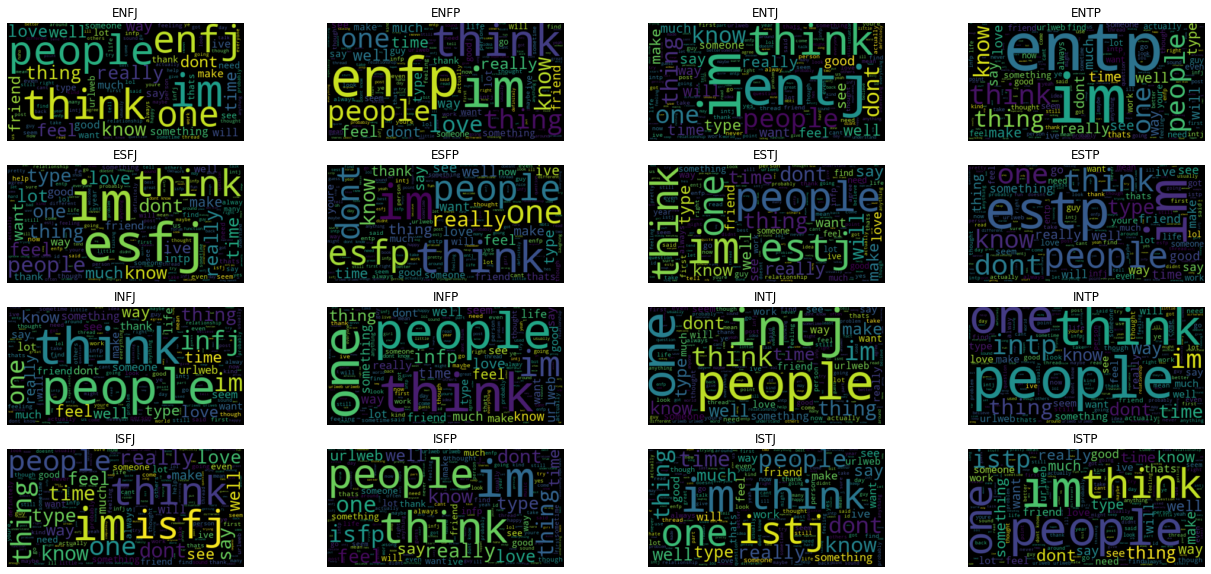

In [9]:
# Instatiate figure and axis and the number of subplots to use
fig, ax = plt.subplots(nrows=4, ncols=4)
fig.set_size_inches(22, 10)

# Create a list containing all the words for all the personalities then
# loop through these creating a wordcloud for each one
random = grouped_wordclouds['words']
for i, j in grouped_wordclouds.iterrows():
    text = ', '.join(random[i])

    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated images:
    plt.subplot(4, 4, (i+1))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(str(grouped_wordclouds['type'].iloc[i]))

This graphic displayes ...



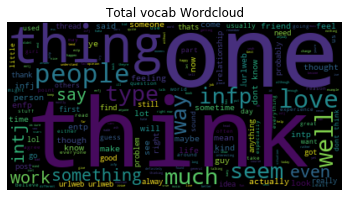

In [10]:
# Create a list containing all the words for all the personalities then loop
# through these creating a wordcloud for the total dataset
grouped_wordclouds = grouped_wordclouds['words']

vocab = []
for i in random:
    vocab.append(i)

flat_vocab = []
for sublist in vocab:
    for item in sublist:
        flat_vocab.append(item)

text = ', '.join(word for word in flat_vocab)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Total vocab Wordcloud')
plt.show()

<a id="section11"></a>
### EDA Conclusions

We concluded several intersting things from our EDA analysis:
1. The dataset is highly skewed in favour of introverted types and class imbalances are rife. Bootstrapping or resampling techniques could be used to rebalance this data but we chose not to do this due to word frequency measures being a main pillar of our analysis 
1. There are several words, such as one, think, thing, people etc., that occur multiple times aross the body of text. (these words can be iewd in the Total vocab Wordcloud plot)
2. Several stopwords such as im and dont etc., occur very frequently across all the personality types

These discoveries necesitated the removal of english stopwords and the use of TdidfVectoriser in our final data preparation step

<a id="section12"></a>
## 4. Data Preprocessing and Final preparation for modeling

<a id="section13"></a>
### Importing the necessary librairies for preprocessing and final data preparation

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

<a id="section14"></a>
### Processing raw data using TfidfVectorizer

We chose to use TfidfVectorizer as it enables us to remove stopwords and set boundaries for removal of words that over occur in the dataset. This particualr vectoriser supports frequency based removal of words and the ability to limit the feature size of our dataset to a resonable size

In [12]:
# Create a TfidfVectorizer and apply it to the data
TFIDF_vect = TfidfVectorizer()
all_data_TFIDF = TFIDF_vect.fit_transform(all_data['posts'])

# Check the TfidfVectorizer shape
all_data_TFIDF.shape

(8675, 145351)

In [13]:
# Create a TfidfVectorizer with better parameter usage and apply it to the data
TFIDF_vect = TfidfVectorizer(lowercase=True, stop_words='english', max_df=0.5,
                             min_df=0.01, max_features=10000)
all_data_TFIDF = TFIDF_vect.fit_transform(all_data['posts'])

# Check the new TfidfVectorizer shape
all_data_TFIDF.shape

(8675, 5150)

<a id="section15"></a>
### Split the processed data into train and test sets for use in the modeling section

In [14]:
# Split into train and test and check that shapes match
train = all_data_TFIDF[:ntrain]
test = all_data_TFIDF[ntrain:]
print(train.shape)
print(test.shape)
print(y_train.shape)

(6506, 5150)
(2169, 5150)
(6506, 4)


<a id="section16"></a>
## 5. Initial Modelling

<a id="section17"></a>
### Importing the necessary librairies for modeling and scoring

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import optuna

<a id="section18"></a>
### Creating a cross-validation log loss scoring function

We created this fuction as it allows us to use cross validation scoring as opposed to tranditional train test spilt scoring. This enabled better judging of scores during the hyperparameter tuning stage. As an added benfit the metric that kaggle uses to score submissions (log loss) could be used during the model building process

In [16]:
# Define fuction to calculate the log loss over 5 cross validation sets
def log_loss_cv(model, category):
    '''
    Gets the average log loss score for a model across a given number of 
    cross validation sets.

    Parameters
    ----------

    model: model_object
        model object containing a trained sklearn model on which the score can
        be calculated.

    category: dataframe
        dataframe object containing the specific response variable to use
        as the response.

    Returns
    -------

    log_loss: int
        average log loss score for a given model and response variable.

    '''

    log_loss = -cross_val_score(model, train, y_train[category], 
                                scoring="neg_log_loss", cv=5)
    return(log_loss)

<a id="section19"></a>
### Logistic Regression Modeling

Logistic Regression measures the relationship between the dependent variable (our label, what we want to predict) and the one or more independent variables (our features), by estimating probabilities using it’s underlying logistic function. 

Pros:
- Low variance
- Provides probabilities for outcomes
- Works well with diagonal (feature) decision boundaries

Cons:
- High bias

In [17]:
# Create base Logistic Regression models for personality attributes
logreg_EI = make_pipeline(LogisticRegression())
logreg_SN = make_pipeline(LogisticRegression())
logreg_TF = make_pipeline(LogisticRegression())
logreg_JP = make_pipeline(LogisticRegression())

# Check the cross-validation scores of the Logistic Regression base models
# on the train data
EI_score = log_loss_cv(logreg_EI, 'E/I')
SN_score = log_loss_cv(logreg_SN, 'S/N')
TF_score = log_loss_cv(logreg_TF, 'T/F')
JP_score = log_loss_cv(logreg_JP, 'J/P')

# Print out model score for each category
print('Extrovert/Introvert Score: ', EI_score.mean())
print('Sensing/Intuition Score: ', SN_score.mean())
print('Thinking/Feeling Score: ', TF_score.mean())
print('Judging/Percieving Score: ', JP_score.mean())

Extrovert/Introvert Score:  0.36268528648315645
Sensing/Intuition Score:  0.27748778548462305
Thinking/Feeling Score:  0.3860952311352635
Judging/Percieving Score:  0.46900973293817527


<a id="section20"></a>
### Multinomial Naive Bayes Modeling

Multinomial Naive Bayes is a specialized version of Naive Bayes that is designed more for text documents. It estimates the conditional probability of a particular word given a class as the relative frequency of term t in documents belonging to class(c). The variation takes into account the number of occurrences of term t in training documents from class (c),including multiple occurrences.


Pros:
- Computationally fast
- Simple to implement
- Works well with high dimensions

Cons:
- Relies on independence assumption and will perform badly if this assumption is not met

In [18]:
# Create base Multinomial Naive Bayes models for personality attributes
MultiNB_EI = make_pipeline(MultinomialNB())
MultiNB_SN = make_pipeline(MultinomialNB())
MultiNB_TF = make_pipeline(MultinomialNB())
MultiNB_JP = make_pipeline(MultinomialNB())

# Check the cross-validation scores of the Multinomial Naive Bayes base models
# on the train data
EI_score = log_loss_cv(MultiNB_EI, 'E/I')
SN_score = log_loss_cv(MultiNB_EI, 'S/N')
TF_score = log_loss_cv(MultiNB_EI, 'T/F')
JP_score = log_loss_cv(MultiNB_EI, 'J/P')

# Print out model score for each category
print('Extrovert/Introvert Score: ', EI_score.mean())
print('Sensing/Intuition Score: ', SN_score.mean())
print('Thinking/Feeling Score: ', TF_score.mean())
print('Judging/Percieving Score: ', JP_score.mean())

Extrovert/Introvert Score:  0.47152417194676916
Sensing/Intuition Score:  0.3687655692295193
Thinking/Feeling Score:  0.504291167487102
Judging/Percieving Score:  0.6009256385842432


<a id="section21"></a>
### AdaBoost Modeling

Adaboost is an ensemble technique that combines multiple 'weak classifiers' into a single 'strong classifier'. Ensemble learning methods are meta-algorithms that combine several machine learning methods into a single predictive model to increase performance. Ensemble methods can decrease variance using bagging approach, bias using a boosting approach, or improve predictions using stacking approach.


Pros:
- Reduces overfitting
- Increases performance

Cons:
- High bias
- Long runtime

In [19]:
# Create base AdaBoost models for personality attributes
AdaB_EI = make_pipeline(AdaBoostClassifier())
AdaB_SN = make_pipeline(AdaBoostClassifier())
AdaB_TF = make_pipeline(AdaBoostClassifier())
AdaB_JP = make_pipeline(AdaBoostClassifier())

# Check the cross-validation scores of the AdaBoost base models
# on the train data
EI_score = log_loss_cv(AdaB_EI, 'E/I')
SN_score = log_loss_cv(AdaB_EI, 'S/N')
TF_score = log_loss_cv(AdaB_EI, 'T/F')
JP_score = log_loss_cv(AdaB_EI, 'J/P')

# Print out model score for each category
print('Extrovert/Introvert Score: ', EI_score.mean())
print('Sensing/Intuition Score: ', SN_score.mean())
print('Thinking/Feeling Score: ', TF_score.mean())
print('Judging/Percieving Score: ', JP_score.mean())

Extrovert/Introvert Score:  0.6720798844463867
Sensing/Intuition Score:  0.6533118902977294
Thinking/Feeling Score:  0.6754993355792571
Judging/Percieving Score:  0.6801019668518403


<a id="section22"></a>
## 6. Hyperparameter tuning

Hyperparameters are preset parameter values of a machine learning model which directy control the behavior of the training algorithm and when optimized can have a significant impact on the model and the way it works. Hyperparameters directly affect how the model is structured and we do this to identify which parameters perform optimally for the machine learning algorithm.

We chose to use [Optuna](https://optuna.org) to perform our hyperparameter tuning for the following reasons:
1. Other frameworks separately define the search space and the objective function. In Optuna, the search spaces are defined inside the objective function, and all hyperparameters are defined on the run. This feature makes the code written in Optuna more modulated and easier to modify.
2. Optuna can parallelize optimization. To initialise parallelization, you can simply execute multiple optimization processes, and Optuna will automatically share trials in background.
3. Pruning feature automatically stops unpromising trials at the early stages of the training (a.k.a., automated early-stopping).
4. Optuna is based on a Bayesian optimization algorithm, which accelerates your hyperparameter search. The pruning and parallelization features help try out large number of hyperparameter combinations in a short time.

This enabled us to perform more iterations of each hyperparameter tuning step that we would have performed with RandomisedSearchCV and thus create more accurate models. Furtuermore Optuna allowed us to save time and compute resources when performing the hyperparameter tuning

<a id="section23"></a>
### Logistic Regression

In [20]:
# Define an objective function to be minimized.
def objective(trial):

    # Invoke suggest methods of a Trial object to generate hyperparameters.
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    tol = trial.suggest_loguniform('tol', 1e-10, 1)
    C = trial.suggest_loguniform('C', 1e-10, 1)
    random_state = trial.suggest_int('random_state', 1, 10)
    max_iter = trial.suggest_int('max_iter', 1000, 10000)
    warm_start = trial.suggest_categorical('warm_start', [True, False])

    # Create a variable containing the model and a set of 
    # selected hyperparameter values
    classifier_obj = LogisticRegression(penalty=penalty,
                                        tol=tol,
                                        C=C,
                                        random_state=random_state,
                                        max_iter=max_iter,
                                        warm_start=warm_start)

    # Define x and y variables
    x = train
    y = y_train['E/I']

    # Check cross validation score of the model based on x and y values
    score = cross_val_score(classifier_obj, x, y, scoring="neg_log_loss")
    accuracy = score.mean()

    # A objective value linked with the Trial object.
    return 1.0 - accuracy

# Create a new study and invoke optimization of the objective function
study = optuna.create_study()
study.optimize(objective, n_trials=1000)

[I 2019-06-28 13:59:43,163] Finished trial#0 resulted in value: 1.6931273114641021. Current best value is 1.6931273114641021 with parameters: {'penalty': 'l2', 'tol': 3.3643901669683814e-08, 'C': 5.8399327497368576e-08, 'random_state': 9, 'max_iter': 1828, 'warm_start': False}.
[I 2019-06-28 13:59:43,908] Finished trial#1 resulted in value: 1.4309401022688002. Current best value is 1.4309401022688002 with parameters: {'penalty': 'l2', 'tol': 0.00029141691246277566, 'C': 0.23169931229919616, 'random_state': 8, 'max_iter': 3250, 'warm_start': True}.
[I 2019-06-28 13:59:44,451] Finished trial#2 resulted in value: 1.693112546659055. Current best value is 1.4309401022688002 with parameters: {'penalty': 'l2', 'tol': 0.00029141691246277566, 'C': 0.23169931229919616, 'random_state': 8, 'max_iter': 3250, 'warm_start': True}.
[I 2019-06-28 13:59:45,049] Finished trial#3 resulted in value: 1.5434883246171518. Current best value is 1.4309401022688002 with parameters: {'penalty': 'l2', 'tol': 0.000

In [21]:
# Used to print the optimal hyperparameters found by the objective function
study.best_params

{'penalty': 'l1',
 'tol': 3.666642882751639e-08,
 'C': 0.9997405370943092,
 'random_state': 6,
 'max_iter': 8310,
 'warm_start': True}

<a id="section24"></a>
#### Final modeling with hyperparameters

In [31]:
# Run Logistic Regression models using optimised hyperparameters
logreg_EI = make_pipeline(LogisticRegression(penalty='l1',
                                             tol=0.003850701503405173,
                                             C=0.9981811566847507,
                                             random_state=1,
                                             max_iter=1762,
                                             warm_start=True))
logreg_SN = make_pipeline(LogisticRegression(penalty='l1',
                                             tol=0.003850701503405173,
                                             C=0.9981811566847507,
                                             random_state=1,
                                             max_iter=1762,
                                             warm_start=True))
logreg_TF = make_pipeline(LogisticRegression(penalty='l1',
                                             tol=0.003850701503405173,
                                             C=0.9981811566847507,
                                             random_state=1,
                                             max_iter=1762,
                                             warm_start=True))
logreg_JP = make_pipeline(LogisticRegression(penalty='l1',
                                             tol=0.003850701503405173,
                                             C=0.9981811566847507,
                                             random_state=1,
                                             max_iter=1762,
                                             warm_start=True))

In [32]:
# Check the cross-validation score of the model from the train data
EI_score = log_loss_cv(logreg_EI, 'E/I')
SN_score = log_loss_cv(logreg_SN, 'S/N')
TF_score = log_loss_cv(logreg_TF, 'T/F')
JP_score = log_loss_cv(logreg_JP, 'J/P')

# Print out model score for each category
print('Extrovert/Introvert Score: ' + EI_score.mean())
print('Sensing/Intuition Score: ' + SN_score.mean())
print('Thinking/Feeling Score: ' + TF_score.mean())
print('Judging/Percieving Score: ' + JP_score.mean())

0.3433736082375848 0.2585295045153877 0.37665957774572856 0.4442140993013629


<a id="section25"></a>
### Multinomial Naive Bayes

In [44]:
# Define an objective function to be minimized.
def objective(trial):

    # Invoke suggest methods of a Trial object to generate hyperparameters.
    alpha = trial.suggest_loguniform('alpha', 1e-10, 1)
    fit_prior = trial.suggest_categorical('fit_prior', [True, False])

    # Create a variable containing the model and a set of 
    # selected hyperparameter values
    classifier_obj = MultinomialNB(alpha=alpha,
                                   fit_prior=fit_prior)

    # Define x and y variables
    x = train
    y = y_train['E/I']

    # Check cross validation score of the model based on x and y values
    score = cross_val_score(classifier_obj, x, y, scoring="neg_log_loss")
    accuracy = score.mean()

    # A objective value linked with the Trial object.
    return 1.0 - accuracy

# Create a new study and invoke optimization of the objective function
study = optuna.create_study()
study.optimize(objective, n_trials=1000)

[I 2019-06-24 11:55:08,639] Finished trial#0 resulted in value: 1.4812835023099118. Current best value is 1.4812835023099118 with parameters: {'alpha': 2.728903724534952e-05, 'fit_prior': True}.
[I 2019-06-24 11:55:08,834] Finished trial#1 resulted in value: 1.514160270120172. Current best value is 1.4812835023099118 with parameters: {'alpha': 2.728903724534952e-05, 'fit_prior': True}.
[I 2019-06-24 11:55:09,034] Finished trial#2 resulted in value: 1.5281037529857717. Current best value is 1.4812835023099118 with parameters: {'alpha': 2.728903724534952e-05, 'fit_prior': True}.
[I 2019-06-24 11:55:09,296] Finished trial#3 resulted in value: 1.5076885031565825. Current best value is 1.4812835023099118 with parameters: {'alpha': 2.728903724534952e-05, 'fit_prior': True}.
[I 2019-06-24 11:55:09,550] Finished trial#4 resulted in value: 1.5319416340134246. Current best value is 1.4812835023099118 with parameters: {'alpha': 2.728903724534952e-05, 'fit_prior': True}.
[I 2019-06-24 11:55:09,752

In [45]:
# Used to print the optimal hyperparameters found by the objective function
study.best_params

{'alpha': 0.08874918773669986, 'fit_prior': True}

<a id="section26"></a>
#### Final modeling with hyperparameters

In [46]:
# Run Multinomial Naive Bayes models using optimised hyperparameters
MultiNB_EI = make_pipeline(MultinomialNB(alpha=0.08874918773669986,
                                         fit_prior=True))
MultiNB_SN = make_pipeline(MultinomialNB(alpha=0.08874918773669986,
                                         fit_prior=True))
MultiNB_TF = make_pipeline(MultinomialNB(alpha=0.08874918773669986,
                                         fit_prior=True))
MultiNB_JP = make_pipeline(MultinomialNB(alpha=0.08874918773669986,
                                         fit_prior=True))

In [47]:
# Check the cross-validation score of the model from the train data
EI_score = log_loss_cv(MultiNB_EI, 'E/I')
SN_score = log_loss_cv(MultiNB_EI, 'S/N')
TF_score = log_loss_cv(MultiNB_EI, 'T/F')
JP_score = log_loss_cv(MultiNB_EI, 'J/P')

# Print out model score for each category
print('Extrovert/Introvert Score: ' + EI_score.mean())
print('Sensing/Intuition Score: ' + SN_score.mean())
print('Thinking/Feeling Score: ' + TF_score.mean())
print('Judging/Percieving Score: ' + JP_score.mean())

0.46326700660923203 0.3417561350664858 0.48593837124111666 0.596807473972023


<a id="section27"></a>
### AdaBoost

In [50]:
# Define an objective function to be minimized.
def objective(trial):

    # Invoke suggest methods of a Trial object to generate hyperparameters.
    n_estimators = trial.suggest_int('n_estimators', 1, 100)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-10, 1)
    algorithm = trial.suggest_categorical('algorithm', ['SAMME', 'SAMME.R'])
    random_state = trial.suggest_int('random_state', 1, 10)

    # Create a variable containing the model and a set of 
    # selected hyperparameter values
    classifier_obj = AdaBoostClassifier(n_estimators=n_estimators,
                                        learning_rate=learning_rate,
                                        algorithm=algorithm,
                                        random_state=random_state)

    # Define x and y variables
    x = train
    y = y_train['E/I']

    # Check cross validation score of the model based on x and y values
    score = cross_val_score(classifier_obj, x, y, scoring="neg_log_loss")
    accuracy = score.mean()

    # A objective value linked with the Trial object.
    return 1.0 - accuracy

# Create a new study and invoke optimization of the objective function
study = optuna.create_study()
study.optimize(objective, n_trials=100)

[I 2019-06-24 12:10:31,180] Finished trial#0 resulted in value: 1.5062285956124941. Current best value is 1.5062285956124941 with parameters: {'n_estimators': 31, 'learning_rate': 1.1796311566045528e-07, 'algorithm': 'SAMME.R', 'random_state': 8}.
[I 2019-06-24 12:10:49,386] Finished trial#1 resulted in value: 1.5603696078288354. Current best value is 1.5062285956124941 with parameters: {'n_estimators': 31, 'learning_rate': 1.1796311566045528e-07, 'algorithm': 'SAMME.R', 'random_state': 8}.
[I 2019-06-24 12:11:17,053] Finished trial#2 resulted in value: 1.560369699619799. Current best value is 1.5062285956124941 with parameters: {'n_estimators': 31, 'learning_rate': 1.1796311566045528e-07, 'algorithm': 'SAMME.R', 'random_state': 8}.
[I 2019-06-24 12:11:36,617] Finished trial#3 resulted in value: 1.5606837858095437. Current best value is 1.5062285956124941 with parameters: {'n_estimators': 31, 'learning_rate': 1.1796311566045528e-07, 'algorithm': 'SAMME.R', 'random_state': 8}.
[I 2019-0

In [52]:
# Used to print the optimal hyperparameters found by the objective function
study.best_params

{'n_estimators': 84,
 'learning_rate': 0.0025576981225485613,
 'algorithm': 'SAMME.R',
 'random_state': 4}

<a id="section28"></a>
#### Final modeling with hyperparameters

In [41]:
# Run AdaBoost models using optimised hyperparameters
AdaB_EI = make_pipeline(AdaBoostClassifier(n_estimators=84,
                                           learning_rate=0.0025576981225485613,
                                           algorithm='SAMME.R',
                                           random_state=4))
AdaB_SN = make_pipeline(AdaBoostClassifier(n_estimators=84,
                                           learning_rate=0.0025576981225485613,
                                           algorithm='SAMME.R',
                                           random_state=4))
AdaB_TF = make_pipeline(AdaBoostClassifier(n_estimators=84,
                                           learning_rate=0.0025576981225485613,
                                           algorithm='SAMME.R',
                                           random_state=4))
AdaB_JP = make_pipeline(AdaBoostClassifier(n_estimators=84,
                                           learning_rate=0.0025576981225485613,
                                           algorithm='SAMME.R',
                                           random_state=4))

In [43]:
# Check the cross-validation score of the model from the train data
EI_score = log_loss_cv(AdaB_EI, 'E/I')
SN_score = log_loss_cv(AdaB_EI, 'S/N')
TF_score = log_loss_cv(AdaB_EI, 'T/F')
JP_score = log_loss_cv(AdaB_EI, 'J/P')

# Print out model score for each category
print('Extrovert/Introvert Score: ' + EI_score.mean())
print('Sensing/Intuition Score: ' + SN_score.mean())
print('Thinking/Feeling Score: ' + TF_score.mean())
print('Judging/Percieving Score: ' + JP_score.mean())

0.6724428630328969 0.6542441074506072 0.6746464044458202 0.6800687076087273


<a id="section29"></a>
## 7. Final model fitting and submission creation

In [33]:
# Fit final models to training data
logreg_EI.fit(train, y_train['E/I'])
logreg_SN.fit(train, y_train['S/N'])
logreg_TF.fit(train, y_train['T/F'])
logreg_JP.fit(train, y_train['J/P'])

Pipeline(memory=None,
         steps=[('logisticregression',
                 LogisticRegression(C=0.9981811566847507, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=1762, multi_class='warn',
                                    n_jobs=None, penalty='l1', random_state=1,
                                    solver='warn', tol=0.003850701503405173,
                                    verbose=0, warm_start=True))],
         verbose=False)

In [34]:
# Generate predictions
EI_y_pred_test = logreg_EI.predict(test)
SN_y_pred_test = logreg_SN.predict(test)
TF_y_pred_test = logreg_TF.predict(test)
JP_y_pred_test = logreg_JP.predict(test)

In [39]:
# Create submission dataframe and add predictions to it
sub = pd.DataFrame()
sub['id'] = df_test_Id
sub['mind'] = EI_y_pred_test
sub['energy'] = SN_y_pred_test
sub['nature'] = TF_y_pred_test
sub['tactics'] = JP_y_pred_test

# Write submission dataframe to a csv for submission
sub.to_csv('submission.csv', index=False)

<a id="section30"></a>
## 8. Conclusion and final thoughts

The aim of this project was to predict a person's MBTI personality type according to their online social media posts. To tackle this challenge we employed the use of Machine Learning Classification and NLP techniques. Classification of each MBTI type is based off four categories, each of which have two classes that an individual can be classified as. Each category was created as a target variable with binary labels assigned to each class. The data was preprocessed to remove stopwords and a cross validation scoring function was setup. Three classification models were tested for best output and hyperparameter tuning was done to optimize the models to yield the best results. Using the cross validation scoring function, we concluded that the Logistic Regression model performed the best in comparison to the Mulinomial Naive Bayes and AdaBoost models. We have concluded that Logistic Regression performed better due to us perfomring binary classification on each category rather than multiclass classification